# Import Library

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud sastrawi nltk scikit-learn tensorflow torch transformers gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 38.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import csv
import requests
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Set random seed
seed = 0
np.random.seed(seed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Load Dataset

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print("File yang dipilih:", filename)
    df = pd.read_csv(filename)

Saving roblox_reviews.csv to roblox_reviews.csv
File yang dipilih: roblox_reviews.csv


In [ ]:
app_reviews_df = pd.read_csv('roblox_reviews.csv')
print(f"Jumlah ulasan: {app_reviews_df.shape}")

Jumlah ulasan: (157500, 2)


In [ ]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,Review,Score
0,"gamenya bagus,cuman ngebug dikit, Baru itu ada...",5
1,Terdapat ratusan game lebih dengan tema berbed...,5
2,"game nya baguss lalu map"" nya juga seru mungki...",5
3,"ini game yang udah kumainin lama, dan makin up...",4
4,banyak bug sama banyak orang sus di Brookhaven...,3


# Preprocessing

In [ ]:
# 3. Preprocessing
# Kamus slang
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords.get(word.lower(), word) for word in words]
    return ' '.join(fixed_words)

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.strip()
    return text

def casefoldingText(text):
    return text.lower()

def tokenizingText(text):
    return word_tokenize(text)

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian')).union(set(stopwords.words('english')))
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'])
    return [txt for txt in text if txt not in listStopwords and len(txt) > 2]

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return [stemmer.stem(word) for word in text]

def toSentence(list_words):
    return ' '.join(list_words)


In [ ]:
# Terapkan preprocessing tanpa stemming
app_reviews_df['Review'] = app_reviews_df['Review'].astype(str)
app_reviews_df['text_clean'] = app_reviews_df['Review'].apply(cleaningText)
app_reviews_df['text_casefolding'] = app_reviews_df['text_clean'].apply(casefoldingText)
app_reviews_df['text_slangwords'] = app_reviews_df['text_casefolding'].apply(fix_slangwords)
app_reviews_df['text_tokenized'] = app_reviews_df['text_slangwords'].apply(tokenizingText)
app_reviews_df['text_stopword'] = app_reviews_df['text_tokenized'].apply(filteringText)
app_reviews_df['text_akhir'] = app_reviews_df['text_stopword'].apply(toSentence)

In [ ]:
app_reviews_df

,Review,Score,text_clean,text_casefolding,text_slangwords,text_tokenized,text_stopword,text_akhir
0,"gamenya bagus,cuman ngebug dikit, Baru itu ada...",5,gamenya baguscuman ngebug dikit Baru itu ada m...,gamenya baguscuman ngebug dikit baru itu ada m...,gamenya baguscuman ngebug dikit baru itu ada m...,"[gamenya, baguscuman, ngebug, dikit, baru, itu...","[gamenya, baguscuman, ngebug, dikit, map, seru...",gamenya baguscuman ngebug dikit map seru kayak...
1,Terdapat ratusan game lebih dengan tema berbed...,5,Terdapat ratusan game lebih dengan tema berbed...,terdapat ratusan game lebih dengan tema berbed...,terdapat ratusan game lebih dengan tema berbed...,"[terdapat, ratusan, game, lebih, dengan, tema,...","[ratusan, game, tema, berbeda, strategi, aksi,...",ratusan game tema berbeda strategi aksi parkou...
2,"game nya baguss lalu map"" nya juga seru mungki...",5,game nya baguss lalu map nya juga seru mungkin...,game nya baguss lalu map nya juga seru mungkin...,game nya baguss lalu map nya juga seru mungkin...,"[game, nya, baguss, lalu, map, nya, juga, seru...","[game, baguss, map, seru, bug, loading, screen...",game baguss map seru bug loading screen stuck ...
3,"ini game yang udah kumainin lama, dan makin up...",4,ini game yang udah kumainin lama dan makin upd...,ini game yang udah kumainin lama dan makin upd...,ini game yang sudah kumainin lama dan makin up...,"[ini, game, yang, sudah, kumainin, lama, dan, ...","[game, kumainin, update, seru, bug, susah, ket...",game kumainin update seru bug susah ketik susa...
4,banyak bug sama banyak orang sus di Brookhaven...,3,banyak bug sama banyak orang sus di Brookhaven...,banyak bug sama banyak orang sus di brookhaven...,banyak bug sama banyak orang sus di brookhaven...,"[banyak, bug, sama, banyak, orang, sus, di, br...","[bug, orang, sus, brookhaven, bicara, kasar, m...",bug orang sus brookhaven bicara kasar mohon ni...
...,...,...,...,...,...,...,...,...
157495,Game nya bagus aku suka banget Dan betah bange...,5,Game nya bagus aku suka banget Dan betah bange...,game nya bagus aku suka banget dan betah bange...,game nya bagus aku suka banget dan betah bange...,"[game, nya, bagus, aku, suka, banget, dan, bet...","[game, bagus, suka, banget, betah, banget, mai...",game bagus suka banget betah banget main main ...
157496,Bagus sampai aku gak main pkxd sumpah sumpah m...,5,Bagus sampai aku gak main pkxd sumpah sumpah m...,bagus sampai aku gak main pkxd sumpah sumpah m...,bagus sampai aku gak main pkxd sumpah sumpah m...,"[bagus, sampai, aku, gak, main, pkxd, sumpah, ...","[bagus, main, pkxd, sumpah, sumpah, pakai, wif...",bagus main pkxd sumpah sumpah pakai wifi cepat...
157497,"Aku suka banget game nya banyak map nya juga,m...",5,Aku suka banget game nya banyak map nya jugama...,aku suka banget game nya banyak map nya jugama...,aku suka banget game nya banyak map nya jugama...,"[aku, suka, banget, game, nya, banyak, map, ny...","[suka, banget, game, map, jugamap, fav, roblox...",suka banget game map jugamap fav roblox stk su...
157498,Udah lama banget aku nyoba tapi akunya nggak b...,1,Udah lama banget aku nyoba tapi akunya nggak b...,udah lama banget aku nyoba tapi akunya nggak b...,sudah lama banget aku nyoba tapi akunya tidak ...,"[sudah, lama, banget, aku, nyoba, tapi, akunya...","[banget, nyoba, akunya, ngecek, manusia, pokon...",banget nyoba akunya ngecek manusia pokonknya n...


# Labeling

In [ ]:
# 4. Pelabelan dengan Lexicon
# Load lexicon
lexicon_positive = {}
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Gagal mengambil lexicon positif")

lexicon_negative = {}
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Gagal mengambil lexicon negatif")

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        if word in lexicon_negative:
            score += lexicon_negative[word]

    if score > 1:
        polarity = 'positif'
    elif score < -1:
        polarity = 'negatif'
    else:
        polarity = 'netral'

    return score, polarity

In [ ]:
# Terapkan pelabelan
results = app_reviews_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
app_reviews_df['polarity_score'], app_reviews_df['polarity'] = zip(*results)
print(app_reviews_df['polarity'].value_counts())

polarity
positif    62338
negatif    54516
netral     40646
Name: count, dtype: int64


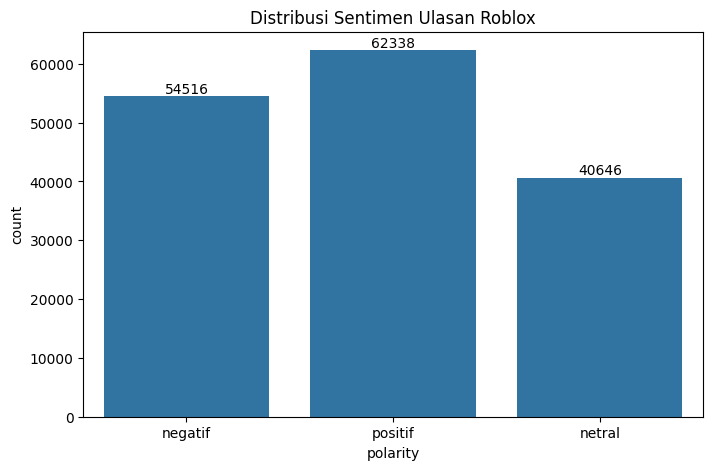

In [ ]:
# Visualisasi distribusi
plt.figure(figsize=(8, 5))
sns.countplot(x='polarity', data=app_reviews_df)
plt.title('Distribusi Sentimen Ulasan Roblox')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [ ]:
# Sentiment-specific filtering for WordCloud

positive_words = set([
    'bagus', 'seru', 'mantap', 'keren', 'suka', 'baik', 'hebat'
])

negative_words = set([
    'buruk', 'jelek', 'error', 'lag', 'crash', 'lemot', 'kecewa'
])

def filter_by_sentiment(tokens, polarity):
    if not isinstance(tokens, list):
        return []
    if polarity == 'positif':
        return [t for t in tokens if t not in negative_words]
    elif polarity == 'negatif':
        return [t for t in tokens if t not in positive_words]
    return tokens

app_reviews_df['text_wc'] = app_reviews_df.apply(
    lambda row: filter_by_sentiment(row['text_stopword'], row['polarity']),
    axis=1
)


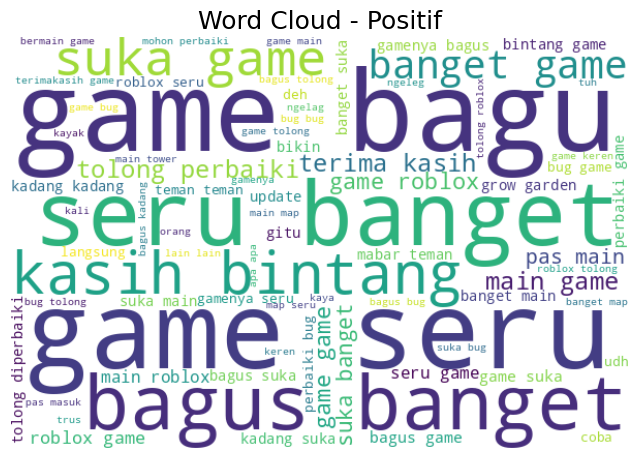

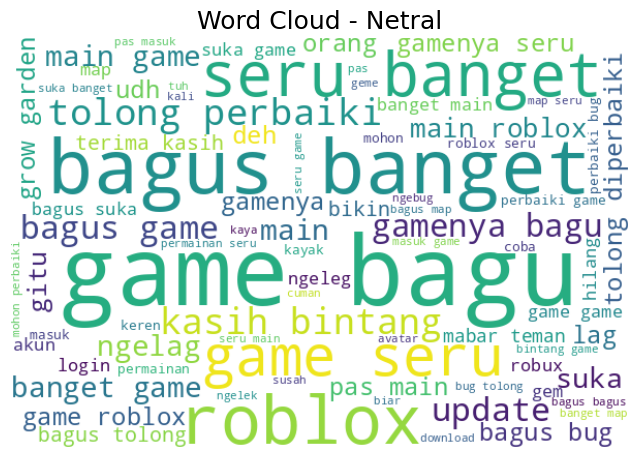

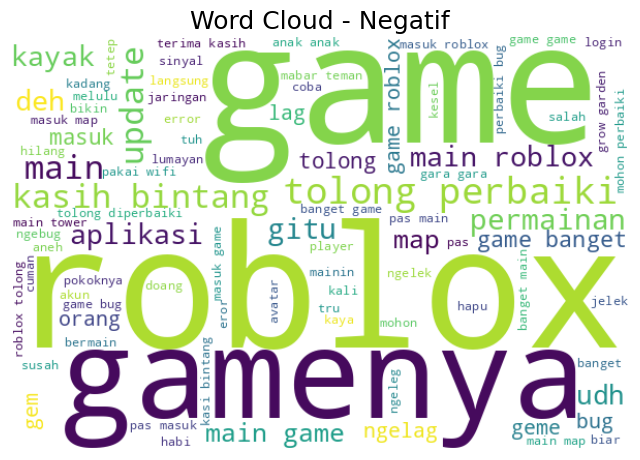

In [ ]:
for polarity in ['positif', 'netral', 'negatif']:
    list_words = ' '.join(
        ' '.join(tokens)
        for tokens in app_reviews_df[app_reviews_df['polarity'] == polarity]['text_wc']
    )

    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        min_font_size=10
    ).generate(list_words)

    plt.figure(figsize=(8, 6))
    plt.title(f'Word Cloud - {polarity.capitalize()}', fontsize=18)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


# **Pemodelan**

In [ ]:
# 5. Persiapan Data untuk Deep Learning
X = app_reviews_df['text_akhir']
y = pd.get_dummies(app_reviews_df['polarity']).values  # One-hot encoding: [negatif, netral, positif]

## Menggunakan LSTM + TF-IDF

In [ ]:
# 6. Tiga Skema Pelatihan
# Skema 1: LSTM + TF-IDF
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=app_reviews_df['polarity'])

model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=2, batch_size=64, validation_data=(X_test, y_test), verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/2
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7894 - loss: 0.4940 - val_accuracy: 0.9269 - val_loss: 0.2075
Epoch 2/2
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9356 - loss: 0.1885 - val_accuracy: 0.9483 - val_loss: 0.1616


In [ ]:
# Evaluasi Skema 1
train_loss, train_acc = model_lstm.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"Skema 1 (LSTM + TF-IDF) - Akurasi Train: {train_acc * 100:.2f}%")
print(f"Skema 1 (LSTM + TF-IDF) - Akurasi Test: {test_acc * 100:.2f}%")


Skema 1 (LSTM + TF-IDF) - Akurasi Train: 96.42%
Skema 1 (LSTM + TF-IDF) - Akurasi Test: 94.83%


## Menggunakan LSTM + Word2Vec

In [ ]:
# Skema 3: LSTM + Word2Vec
# Train Word2Vec
sentences = app_reviews_df['text_stopword'].tolist()
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

# Convert texts to Word2Vec embeddings
def get_w2v_embeddings(text, model, size=100):
    words = text.split()
    embedding = np.zeros(size)
    count = 0
    for word in words:
        if word in model.wv:
            embedding += model.wv[word]
            count += 1
    return embedding / count if count > 0 else embedding

In [ ]:
X_w2v = np.array([get_w2v_embeddings(text, w2v_model) for text in app_reviews_df['text_akhir']])
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.3, random_state=42, stratify=app_reviews_df['polarity'])


In [ ]:
model_lstm_w2v = Sequential([
    Dense(128, activation='relu', input_shape=(100,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_lstm_w2v.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm_w2v.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)



Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1723/1723 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5929 - loss: 0.8818 - val_accuracy: 0.6962 - val_loss: 0.7148
Epoch 2/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6763 - loss: 0.7383 - val_accuracy: 0.7080 - val_loss: 0.6796
Epoch 3/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6934 - loss: 0.7043 - val_accuracy: 0.7204 - val_loss: 0.6604
Epoch 4/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7011 - loss: 0.6900 - val_accuracy: 0.7231 - val_loss: 0.6531
Epoch 5/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7086 - loss: 0.6752 - val_accuracy: 0.7299 - val_loss: 0.6421
Epoch 6/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7129 - loss: 0.6715 - val_accuracy: 0.7286 - val_loss: 0.6365
Epoch 7/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7167 - loss: 0.6634 - val_accuracy: 0.7331 - val_loss: 0.6307
Epoch 8/10
1723/1723 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7209 - loss: 0.6538 - val_accura

In [ ]:
# Evaluasi Skema 3
train_loss, train_acc = model_lstm_w2v.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model_lstm_w2v.evaluate(X_test, y_test, verbose=0)
print(f"Skema 3 (LSTM + Word2Vec) - Akurasi Train: {train_acc * 100:.2f}%")
print(f"Skema 3 (LSTM + Word2Vec) - Akurasi Test: {test_acc * 100:.2f}%")


Skema 3 (LSTM + Word2Vec) - Akurasi Train: 75.21%
Skema 3 (LSTM + Word2Vec) - Akurasi Test: 73.94%


In [ ]:
# 7. Prediksi Kalimat Baru
def predict_sentiment(text):
    cleaned = cleaningText(text)
    casefolded = casefoldingText(cleaned)
    slangfixed = fix_slangwords(casefolded)
    tokenized = tokenizingText(slangfixed)
    filtered = filteringText(tokenized)
    final = toSentence(filtered)

    seq = tokenizer.texts_to_sequences([final])
    padded = pad_sequences(seq, maxlen=100)
    pred_probs = model_lstm.predict(padded, verbose=0)
    pred = np.argmax(pred_probs, axis=1)[0]
    return ['negatif', 'netral', 'positif'][pred]

new_texts = [
    "Roblox seru banget, bisa main sama temen dan bikin game sendiri!",
    "Aplikasi ini sering lag, bikin frustrasi saat main."
]

for text in new_texts:
    sentiment = predict_sentiment(text)
    print(f"Ulasan: '{text}' → Sentimen: {sentiment}")



Ulasan: 'Roblox seru banget, bisa main sama temen dan bikin game sendiri!' → Sentimen: positif
Ulasan: 'Aplikasi ini sering lag, bikin frustrasi saat main.' → Sentimen: negatif


In [ ]:
import tensorflow as tf

# Save the LSTM model (model_lstm) in .h5 format
model_lstm.save('sentiment_model_lstm.h5')

print("Model 'sentiment_model_lstm.h5' saved successfully.")

import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


Model 'sentiment_model_lstm.h5' saved successfully.
